In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import os
import shutil
import glob

np.random.seed(2)

## Plot data

In [6]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

x1, y1 = X.flatten()[y == 0], y[y == 0]
x2, y2 = X.flatten()[y == 1], y[y == 1]

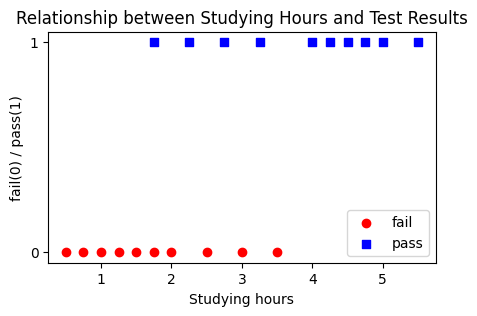

In [7]:
fig = plt.figure(figsize=(5, 3))
plt.scatter(x1, y1, color='r', label='fail')
plt.scatter(x2, y2, color='b', marker='s', label='pass')
plt.yticks([0, 1])
plt.xlabel('Studying hours')
plt.ylabel('fail(0) / pass(1)')
plt.legend(loc='lower right')
plt.title('Relationship between Studying Hours and Test Results')
plt.show()

# Using sigmoid to find the weights

In [8]:
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [9]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

In [10]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def draw_data(img_name, w, iteration):
    fig = plt.figure()
    plt.plot(X0, y0, 'ro', markersize = 8)
    plt.plot(X1, y1, 'bs', markersize = 8)
    xx = np.linspace(-3, 8, 1000)
    w0 = w[-1][0][0]
    w1 = w[-1][1][0]
    threshold = -w0/w1
    yy = sigmoid(w0 + w1*xx)
    plt.axis([-3, 8, -1, 2])
    plt.plot(xx, yy, 'g-', linewidth = 2)
    plt.plot(threshold, .5, 'y^', markersize = 8)
    plt.xlabel('studying hours')
    plt.ylabel('predicted probability of pass')
    plt.title('Iteration: {}'.format(iteration))
    plt.savefig(img_name)
    plt.close()

In [29]:
!mkdir sigmoid_frames

FileNotFoundError: [Errno 2] No such file or directory: './sigmoid_frames/img_1.png'

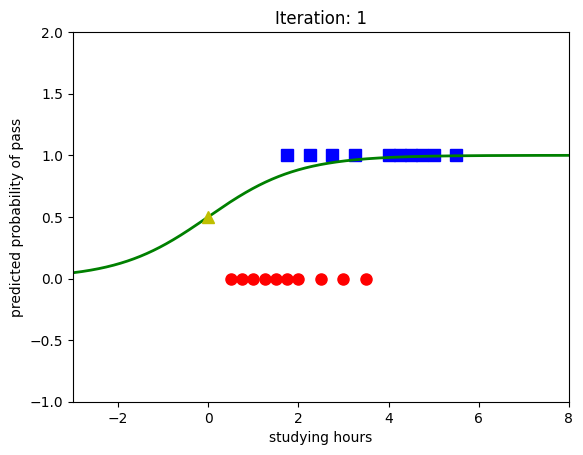

In [11]:
def logistic_sigmoid_regression(X, y, w_init, learning_rate, tol = 1e-4, max_count = 3000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + learning_rate*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
            if count & 1 == 1:
                draw_data('./sigmoid_frames/img_{}.png'.format(count), w, count)
    return w
learning_rate = .05 
d = X.shape[0]
#w_init = np.random.randn(d, 1)
w_init = np.array([[0], [1]])

w = logistic_sigmoid_regression(X, y, w_init, learning_rate)

In [31]:
def create_gif(img_dir, output_file, duration=500):
    # List of image filenames
    image_files = os.listdir(img_dir)
    image_files = sorted(image_files, key=lambda filename: int(filename.split('_')[1].split('.')[0]))
    image_paths = [os.path.join(img_dir, img_file) for img_file in image_files]
    # Open the first image to get its size
    first_image = Image.open(image_paths[0])
    size = first_image.size
    images = []

    try:
        for img in image_paths:
            images.append(Image.open(img))
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    # Create a GIF file
    with Image.new('RGB', size) as gif:
        gif.save(output_file, save_all=True, append_images=images, duration=duration, loop=0)

    shutil.rmtree(img_dir)

create_gif('./sigmoid_frames', './sigmoid_1D_illustration.gif', duration=100)

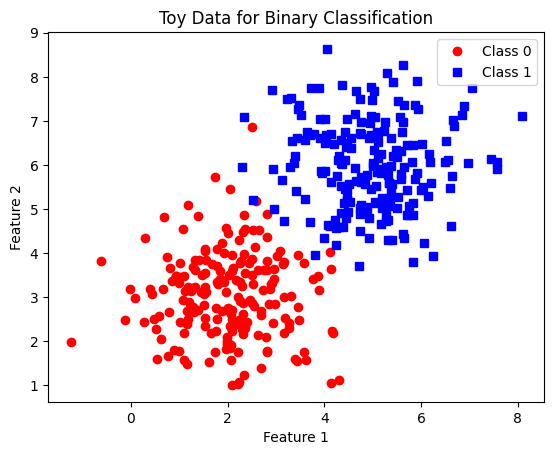

In [13]:
# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples per class
num_samples = 200

# Class 0: Generate random data points with labels 0
class_0_features = np.random.normal(loc=[2, 3], scale=[1, 1], size=(num_samples, 2))
class_0_labels = np.zeros((num_samples, 1))

# Class 1: Generate random data points with labels 1
class_1_features = np.random.normal(loc=[5, 6], scale=[1, 1], size=(num_samples, 2))
class_1_labels = np.ones((num_samples, 1))

# Concatenate the features and labels
X = np.vstack([class_0_features, class_1_features])
y = np.vstack([class_0_labels, class_1_labels])

# Add bias term (intercept)
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

# Plot the data
plt.plot(class_0_features[:, 0], class_0_features[:, 1], 'ro', label='Class 0', markeredgecolor='black')
plt.plot(class_1_features[:, 0], class_1_features[:, 1], 'bs', label='Class 1', markeredgecolor='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy Data for Binary Classification')
plt.legend()
plt.show()

# References

https://machinelearningcoban.com/2017/01/27/logisticregression/